In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model.logistic import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
# Read file
path = '/Users/rodrigovillatoro/Documents/Harbour.Space/07_ml_1/data/ConfLongDemo_JSI.txt'
names = ['name', 'tag', 'timestamp', 'date', 'x', 'y', 'z', 'activity']
date_parser = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S:%f')
df = pd.read_csv(path, names=names, header=None, parse_dates=[3], date_parser=date_parser)

In [3]:
df.head()

,name,tag,timestamp,date,x,y,z,activity
0,A01,010-000-024-033,633790226051280329,2009-05-27 14:03:25.127,4.062931,1.892434,0.507425,walking
1,A01,020-000-033-111,633790226051820913,2009-05-27 14:03:25.183,4.291954,1.781140,1.344495,walking
2,A01,020-000-032-221,633790226052091205,2009-05-27 14:03:25.210,4.359101,1.826456,0.968821,walking
3,A01,010-000-024-033,633790226052361498,2009-05-27 14:03:25.237,4.087835,1.879999,0.466983,walking
4,A01,010-000-030-096,633790226052631792,2009-05-27 14:03:25.263,4.324462,2.072460,0.488065,walking


## Calculate the change in X, Y, Z coordinates for each person

In [4]:
data_frames = []
for name in df['name'].unique():
    temp_df = df[df['name'] == name].copy()
    temp_df['dx'] = temp_df['x'].diff(1)
    temp_df['dy'] = temp_df['y'].diff(1)
    temp_df['dz'] = temp_df['z'].diff(1)
    data_frames.append(temp_df)

In [5]:
# Concatenate the all the data_frames and drop NA's
new_df = pd.concat(data_frames)
new_df = new_df.dropna()

In [6]:
new_df.head()

,name,tag,timestamp,date,x,y,z,activity,dx,dy,dz
1,A01,020-000-033-111,633790226051820913,2009-05-27 14:03:25.183,4.291954,1.781140,1.344495,walking,0.229023,-0.111294,0.837070
2,A01,020-000-032-221,633790226052091205,2009-05-27 14:03:25.210,4.359101,1.826456,0.968821,walking,0.067148,0.045315,-0.375674
3,A01,010-000-024-033,633790226052361498,2009-05-27 14:03:25.237,4.087835,1.879999,0.466983,walking,-0.271266,0.053543,-0.501838
4,A01,010-000-030-096,633790226052631792,2009-05-27 14:03:25.263,4.324462,2.072460,0.488065,walking,0.236627,0.192461,0.021081
5,A01,020-000-033-111,633790226052902087,2009-05-27 14:03:25.290,4.364077,1.767691,1.299996,walking,0.039615,-0.304768,0.811932


## Drop Columns that will not be used in the classification

In [7]:
y = new_df['activity']
X = new_df.drop(['activity', 'date', 'timestamp', 'name'], axis=1)

In [9]:
y = y.astype('category').cat.codes
X['tag'] = X['tag'].astype('category').cat.codes

## Train Logistic Regression

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = LogisticRegression()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [11]:
clf.score(X_test, y_test)

0.42049066951394115

Confussion Matrix:
[[    0   412     0     0   205     0    13     0     0     0   130]
 [    0 11521     0   240   673     0   396     0     0     0   690]
 [    0  1069     0    37    15     0     0     0     0     0   429]
 [    0   882     0   255    40     0     0     0     0     0   129]
 [    0  2811     0    10   992     0     2     0     0     0  2953]
 [    0   271     0     5    32     0     0     0     0     0   123]
 [    0  2099     0     0   642     0    72     0     0     0    87]
 [    0  3589     0   104   242     0    67     0     0     0   708]
 [    0   214     0     6    11     0     0     0     0     0   114]
 [    0   588     0     0    25     0     1     0     0     0    29]
 [    0  3318     0    87   381     0     2     0     0     0  4488]]


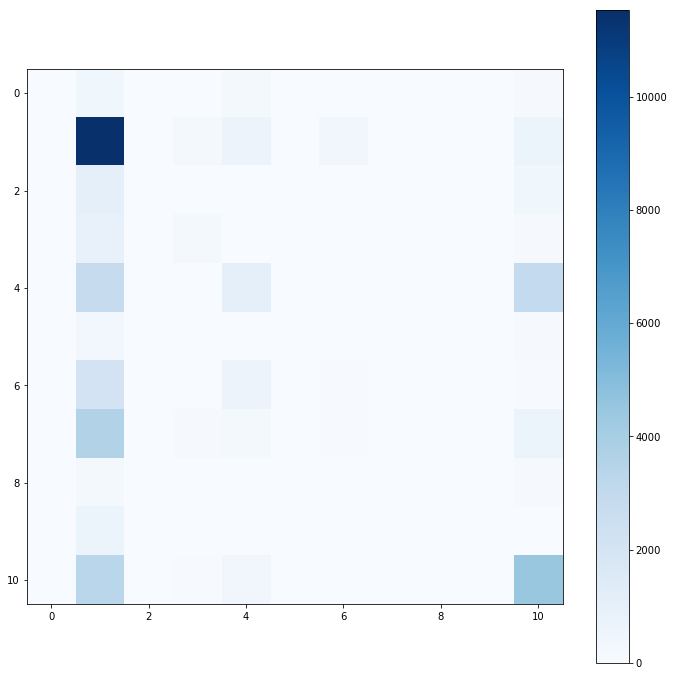

In [12]:
cm = confusion_matrix(y_test, predictions)
print('Confussion Matrix:')
print(cm)
plt.figure(figsize=(12,12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.show()